# Realigning every listening subject

There is, for every listen subject, both a stretch, and an offset that need to be considered.

Let's build a dataframe with the information, for each run, of the offset found and the stretch.

Finally, plot the un-stretched and with offset data, compared to the metadata.

## Generate audio ground truth to calculate stretch

In [ ]:
# from utils import gen_audio_words_length
import numpy as np

# audio_word_length = gen_audio_words_length()

# # Save this file to csv not to have to load it everytime

# # Save it to numpy file
# np.save('audio_word_length.npy', audio_word_length)


audio_word_length = np.load('audio_word_length.npy')



## Find the offset and stretch

In [4]:
from utils import get_raw
import pandas as pd
from tqdm import tqdm
import numpy as np

audio_word_length = np.load('audio_word_length.npy')

df = pd.DataFrame(columns=['subject', 'run', 'offset', 'stretch'])

for subject in tqdm(range(1,59), desc='Subjects'):
    for run in tqdm(range(1,10), desc='Runs', leave=False):
        try:
            raw, word_triggers, events = get_raw(str(subject), run)
            # Calculate the offset between the first word trigger and the first sample
            offset = (word_triggers[0] - raw.first_samp) / raw.info['sfreq']
            # And add the initial time between the first word trigger and the first sample (eg. 3.05 for run 1)
            offset -= events.onset[0]
            # Get the length of the recorded word triggers
            meg_word_length = (word_triggers[-1] - word_triggers[0]) / raw.info['sfreq']
            # Deduct the stretch factor
            stretch = meg_word_length / audio_word_length[run-1]

            # Append the offset and the stretch factor to the dataframe using concat
            df = pd.concat([df, pd.DataFrame({'subject': [subject], 'run': [run], 'offset': [offset], 'stretch': [stretch]})], ignore_index=True)
            # Save the dataframe
            df.to_csv('infos2.csv', index=False)
        except:
            print(f'Error with subject {subject} run {run}')
            continue

Subjects:   0%|          | 0/58 [00:00<?, ?it/s]/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)
/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it b

Error with subject 23 run 1


/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


Error with subject 23 run 2


/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


Error with subject 23 run 3


/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


Error with subject 23 run 4


/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)
/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable resu

Error with subject 56 run 2


/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)
/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable resu

## Testing the alignment! 

In [5]:
import mne
import logging
from tqdm import tqdm
import pandas as pd
from utils import save_multiplot
import os
# Set the logger level to WARNING to reduce verbosity
logger = logging.getLogger('mne')
logger.setLevel(logging.ERROR)

df = pd.DataFrame(columns=['subject', 'run', 'offset', 'stretch'])


for subject in tqdm(range(10,13), desc='Subjects', position=0):
    for run in range(1,10):
        print(f'Processing subject {subject} run {run}')
        # Check if the plot already exists: figures/Multiplot_subject_run.png
        # file_path = f'figures/Multiplot_{subject}_{run}.png'
        # if os.path.exists(file_path):
        #     print(f"The file {file_path} already exists.")
        #     continue
        # else:
        #     print(f"The file {file_path} does not exist. Running the analysis")
                

        try:
            stretch, offset = save_multiplot(subject, run)
            df = pd.concat([df, pd.DataFrame({'subject': [subject], 'run': [run], 'offset': [offset], 'stretch': [stretch]})], ignore_index=True)
            # Save the dataframe
            df.to_csv('infos2.csv', index=False)

        except Exception as e:
            print(f'Error with subject {subject} run {run}')
            raise e
            continue

Subjects:   0%|          | 0/3 [00:00<?, ?it/s]

Processing subject 10 run 1
Processing subject 10 run 2
Processing subject 10 run 3
Processing subject 10 run 4


: 

## Sub 10

/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/home/co/workspace_LPP/code/neurospin-petit-prince/dataset_formatting/auditory_realigning/utils.py:80: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


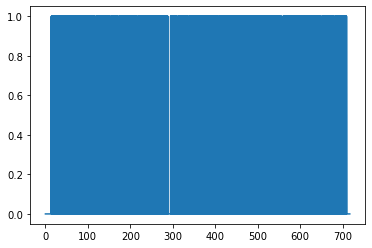

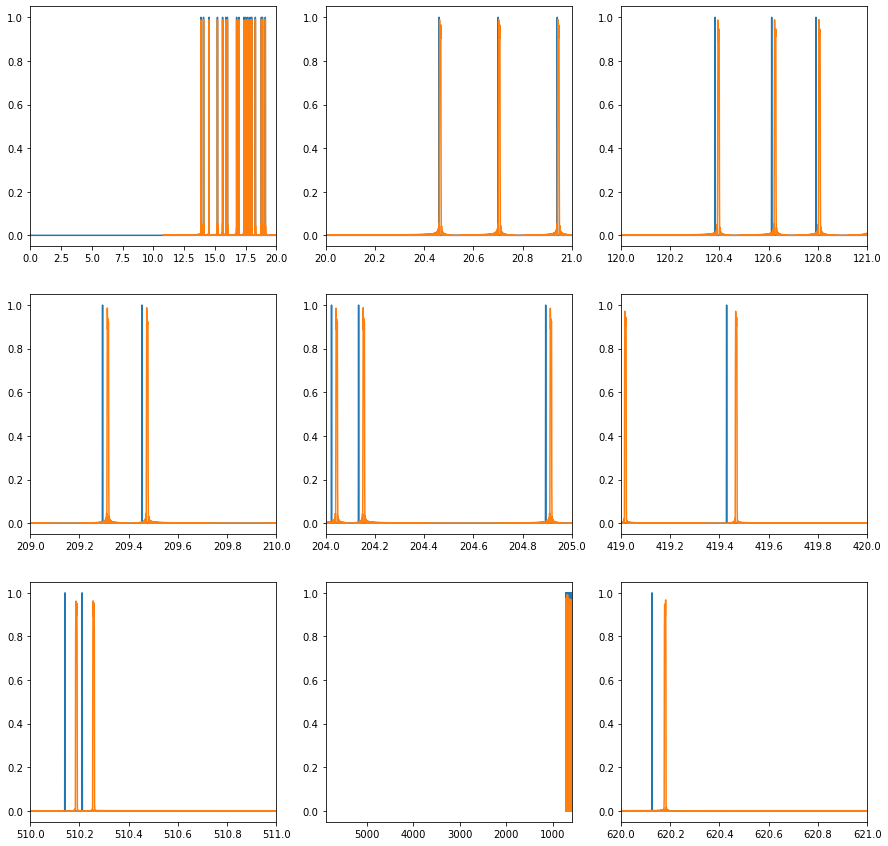

In [5]:
subject = 10

run = 3

from utils import *

raw, word_triggers, events = get_raw(str(subject), run)    
# MEG events

raw.pick(['stim', 'misc'])
events_trigger = mne.find_events(raw, stim_channel="STI008",  shortest_event=1)
times = np.copy(raw.times)
values = np.zeros_like(times)
values[events_trigger[:, 0]-raw.first_samp] = 1

plt.plot(times, values)

# Wav ground truth

from utils import CHAPTER_PATHS

wav_fs, wav = wavfile.read(f'/media/co/T7/workspace-LPP/data/MEG/LPP/PallierListen2023/download/sourcedata/stimuli/audio/{CHAPTER_PATHS[run-1]}')
wav, wav_fs, wav_times = resample_signal(wav, wav_fs, raw.info['sfreq'])

wav_triggers = np.clip(wav[:, 1], 0, 1)

# df = pd.read_csv('infos.csv')
# offset = (df[(df.subject == subject) & (df.run == run)].offset.values[0]) / raw.info['sfreq']
# stretch = df[(df.subject == subject) & (df.run == run)].stretch.values[0]

offset = word_triggers[0] - raw.first_samp
offset = offset / raw.info['sfreq']

# And add the initial time between the first word trigger and the first sample (eg. 3.05 for run 1)
offset -= events.onset[0]

# Get the length of the recorded word triggers
meg_word_length = (word_triggers[-1] - word_triggers[0]) / raw.info['sfreq']
# Deduct the stretch factor
audio_word_length = np.load('audio_word_length.npy')
stretch = meg_word_length / audio_word_length[run-1]

# plt.plot(offset+(wav_times*stretch), wav_triggers)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
xlim_pairs = [(0, 20), (20, 21), (120, 121), (209, 210), (204, 205), (419, 420), (510, 511), (589, 590), (620, 621)]

for i, ax in enumerate(axs.flatten()):
    ax.plot(times, values)
    ax.plot(offset+(wav_times*stretch), wav_triggers)
    ax.set_xlim(xlim_pairs[i])


(709.0, 709.4)

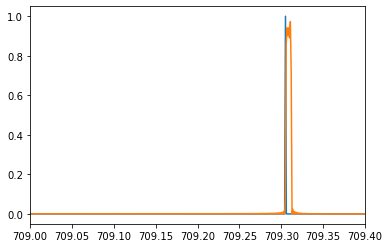

In [31]:
plt.plot(times, values)
plt.plot(offset+(wav_times*stretch), wav_triggers)
plt.xlim((709, 709.4))

In [ ]:
# T